KELOMPOK 4:
RAYHAN ZAKY - 11124188
DIANDRA KEEIRA MARDIYANI - 10124343

# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [2]:
# from google.colab import drive
# # drive.mount('/content/drive')

Memasukkan library yang akan kamu gunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Mengambil file .csv dari Google Drive kamu.

In [6]:
# df = pd.read_csv('/content/drive/MyDrive/FIKTI/Notebook/Dataset/housing_data.csv')
df = pd.read_csv('/content/dataset_buku.csv')

# New Section

In [7]:
df.head()

,Judul,Penulis,Tahun,Kategori,Halaman,Rating,Ulasan,Harga,Bahasa,Stok,Best Seller,eBook
0,Peta Jalan UMKM,Andi Prasetyo,2020,Self Employment,197,4.2,246,Rp85.783,Indonesia,13,yes,yes
1,Menjadi Freelancer Andal,Andi Prasetyo,2021,Self Employment,286,3.9,169,Rp52.540,Indonesia,20,yes,yes
2,Rasa yang Mengikat,Nurul Aini,2023,Novel Indonesia,241,4.6,224,Rp59.648,Indonesia,9,yes,yes
3,Bisnis dari Nol,Putra Nugraha,2018,Self Employment,260,4.1,270,Rp103.122,Indonesia,20,no,yes
4,Bisnis dari Nol,Andi Prasetyo,2020,Self Employment,193,4.4,97,Rp69.541,Indonesia,9,no,yes


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [8]:
print("Jumlah nilai yang hilang pada setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang pada setiap kolom:
Judul          0
Penulis        0
Tahun          0
Kategori       0
Halaman        0
Rating         0
Ulasan         0
Harga          0
Bahasa         0
Stok           0
Best Seller    0
eBook          0
dtype: int64


In [9]:
numerical_cols = ['Tahun', 'Halaman', 'Rating', 'Ulasan', 'Stok']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outlier pada kolom '{col}': {len(outliers)} data")

Outlier pada kolom 'Tahun': 0 data
Outlier pada kolom 'Halaman': 0 data
Outlier pada kolom 'Rating': 0 data
Outlier pada kolom 'Ulasan': 0 data
Outlier pada kolom 'Stok': 0 data


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Kategori', 'Bahasa', 'Best Seller', 'eBook']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Data Preparation

Memisahkan data training dan testing

In [12]:
print("\nData setelah cleaning:")
display(df.head())
print(df.describe())


Data setelah cleaning:


,Judul,Penulis,Tahun,Kategori,Halaman,Rating,Ulasan,Harga,Bahasa,Stok,Best Seller,eBook
0,Peta Jalan UMKM,Andi Prasetyo,0.066815,1,-1.365666,-0.099764,0.771639,Rp85.783,0,0.557353,1,1
1,Menjadi Freelancer Andal,Andi Prasetyo,0.484411,1,0.021826,-0.812363,-0.247507,Rp52.540,0,1.641095,1,1
2,Rasa yang Mengikat,Nurul Aini,1.319602,0,-0.679715,0.850368,0.480454,Rp59.648,0,-0.061928,1,1
3,Bisnis dari Nol,Putra Nugraha,-0.768376,1,-0.383509,-0.337297,1.089294,Rp103.122,0,1.641095,0,1
4,Bisnis dari Nol,Andi Prasetyo,0.066815,1,-1.428025,0.375302,-1.200474,Rp69.541,0,-0.061928,0,1


              Tahun   Kategori       Halaman        Rating        Ulasan  \
count  5.000000e+01  50.000000  5.000000e+01  5.000000e+01  5.000000e+01   
mean   3.418599e-14   0.620000 -3.552714e-16 -2.021716e-15  1.043610e-16   
std    1.010153e+00   0.490314  1.010153e+00  1.010153e+00  1.010153e+00   
min   -1.603567e+00   0.000000 -1.630693e+00 -1.524962e+00 -1.769607e+00   
25%   -7.683761e-01   0.000000 -8.200232e-01 -8.123630e-01 -9.787767e-01   
50%    6.681531e-02   1.000000  1.231594e-01  1.377692e-01  1.297094e-01   
75%    4.844110e-01   1.000000  9.104440e-01  6.128352e-01  9.867181e-01   
max    1.737198e+00   1.000000  1.643164e+00  1.800500e+00  1.433422e+00   

       Bahasa          Stok  Best Seller      eBook  
count    50.0  5.000000e+01    50.000000  50.000000  
mean      0.0 -5.273559e-17     0.540000   0.500000  
std       0.0  1.010153e+00     0.503457   0.505076  
min       0.0 -1.455311e+00     0.000000   0.000000  
25%       0.0 -8.360295e-01     0.000000   0.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Judul'])
y = df['Judul']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (40, 11)
Ukuran data testing : (10, 11)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
df['eBook'] = df['eBook'].map({'yes': 1, 'no': 0})

X = df[['Halaman', 'Ulasan', 'Harga', 'eBook']]
y = df['Rating']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
df['Harga'] = df['Harga'].str.replace('Rp', '')
df['Harga'] = df['Harga'].str.replace('.', '')
df['Harga'] = df['Harga'].astype(float)

In [42]:
df['eBook'] = df['eBook'].map({'yes': 1, 'no': 0})

In [43]:
X = df[['Halaman', 'Ulasan', 'Harga', 'eBook']]
y = df['Rating']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

Mean Squared Error (MSE): 1.440
R2 Score: -0.287


In [48]:
result_df = X_test.copy()
result_df['Actual_Rating'] = y_test
result_df['Predicted_Rating'] = y_pred

print(result_df.head(10))

     Halaman    Ulasan     Harga  eBook  Actual_Rating  Predicted_Rating
13 -0.866793  1.261358  122336.0    NaN      -0.812363          0.064134
39 -0.617356  1.089294   90668.0    NaN       1.325434         -0.071260
30 -1.521564  1.433422   81549.0    NaN      -0.812363          0.520197
45  0.395981  0.176034   95770.0    NaN       0.137769          0.095013
17  0.473930 -1.438716   94992.0    NaN      -1.049896          0.662717
48 -1.131819 -0.909290   91603.0    NaN       1.562967          0.106890
26  1.643164 -0.578398  122741.0    NaN       1.562967          0.004751
25 -1.412435  1.261358   64605.0    NaN       0.375302          0.503570
32  1.159881  0.652518   51049.0    NaN      -1.287429         -0.895500
19  0.130954 -1.451951  124498.0    NaN      -0.574830          0.926379


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [49]:
selected_features = ['Halaman', 'Ulasan', 'Harga', 'eBook']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"[Subset: {selected_features}]")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

[Subset: ['Halaman', 'Ulasan', 'Harga', 'eBook']]
RMSE: 1.200
R²: -0.287


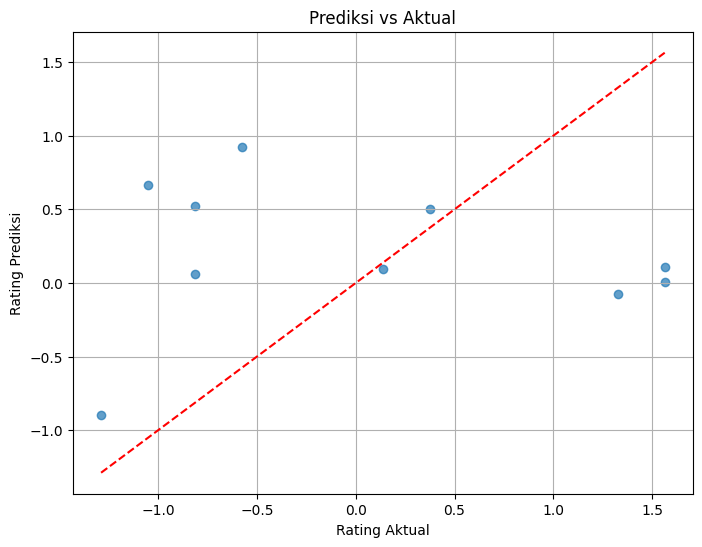

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel('Rating Aktual')
plt.ylabel('Rating Prediksi')
plt.title('Prediksi vs Aktual')
plt.grid(True)
plt.show()